In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage


In [4]:
df = pd.read_csv("hierarchical_clustering.csv")
df.head()


,customer_id,age,annual_income,spending_score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     20 non-null     int64
 1   age             20 non-null     int64
 2   annual_income   20 non-null     int64
 3   spending_score  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [6]:
X = df.drop("customer_id", axis=1)
X.head()


,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


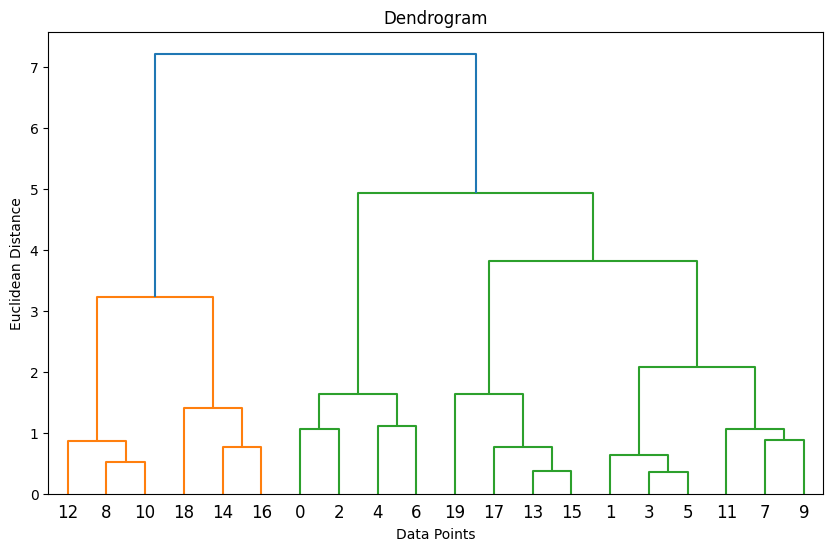

In [8]:
plt.figure(figsize=(10, 6))
dendrogram(linkage(X_scaled, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [9]:
cluster_model = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)

clusters = cluster_model.fit_predict(X_scaled)
clusters


array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

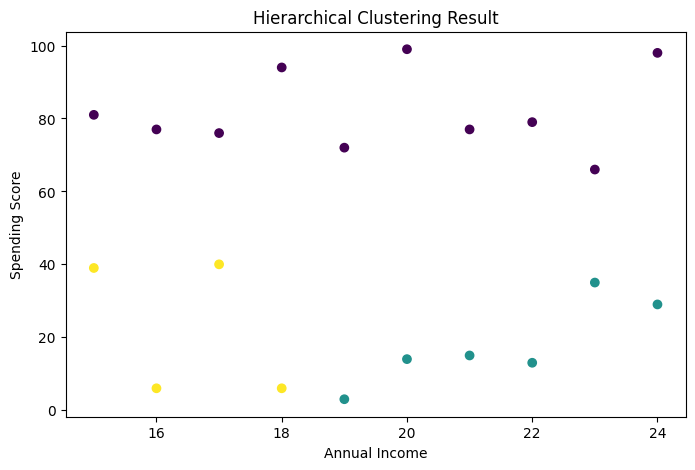

In [10]:
df["Cluster"] = clusters
df.head()
plt.figure(figsize=(8, 5))
plt.scatter(
    df["annual_income"],
    df["spending_score"],
    c=df["Cluster"]
)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Hierarchical Clustering Result")
plt.show()


In [11]:
df.groupby("Cluster").mean()


,customer_id,age,annual_income,spending_score
Cluster,,,,
0,11.0,25.500000,19.5,81.900000
1,14.0,52.166667,21.5,18.166667
2,4.0,26.250000,16.5,22.750000
